**Neural Network from scratch**

A simple two-layer neural network built on MNIST digit recognizer dataset to understand the underlying math of neural networks better.


In [15]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits()

# get the data and target values from digits dataset

data = digits.data
target = digits.target

In [16]:
# get the shape of data array

m, n = data.shape

In [17]:
# split into train and test set

X_test = data[0:100].T
Y_test = target[0:100].T

X_test = X_test / 16.

X_train = data[100:m].T
Y_train = target[100:m].T

X_train = X_train / 16.
_,m_train = X_train.shape

In [18]:
# generating minibatch

def generate_minibatch(X,Y,j,batch_size):
        X_batch = X[:,j:j+batch_size]
        Y_batch = Y[j:j+batch_size]
        yield X_batch, Y_batch

In [19]:
class mlp:

    # initialize and return weights and biases (W1,b1,W2,b2)
    def init_params(batch_size):
        W1 = np.random.normal(0,0.2,(batch_size,64)) 
        b1 = np.zeros((batch_size,1))
        W2 = np.random.normal(0,0.2,(batch_size,10)) 
        b2 = np.zeros((batch_size,1))
        return W1, b1, W2, b2

    # sigmoid activation
    def sigmoid(Z):
        return np.exp(Z)/(1+np.exp(Z))

    # softmax activation
    def softmax(Z):
        A = np.exp(Z) / sum(np.exp(Z))
        return A

    # forward pass
    def forward_prop(W1, b1, W2, b2, X):
        Z1 = W1.dot(X) + b1
        A1 = mlp.sigmoid(Z1)
        Z2 = W2.dot(A1) + b2
        A2 = mlp.softmax(Z2)
        return Z1, A1, Z2, A2

    # sigmoid derivative
    def sigmoid_deriv(Z):
        return mlp.sigmoid(Z)*(1-mlp.sigmoid(Z))

    # one-hot encode target values
    # threw a weird error. look into gradient descent
    def one_hot(Y):
        Y = Y.astype(int)
        one_hot_Y = np.zeros((Y.size, 10))
        one_hot_Y[np.arange(Y.size), Y] = 1
        one_hot_Y = one_hot_Y.T
    #     print(one_hot_Y[:,0:10],one_hot_Y.shape)
        return one_hot_Y

    # loss (also not required, as derivative of CCE Loss along with softmax function is just
    # the difference between the actual and predicted outputs )
    def loss(A2):
        return -np.log(np.mean(A2))

    # backward pass
    def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
        one_hot_Y = mlp.one_hot(Y)
        dZ2 = A2 - one_hot_Y
        dW2 = 1 / m * dZ2.dot(A1.T)
        db2 = 1 / m * np.sum(dZ2)
        dZ1 = W2.T.dot(dZ2) * mlp.sigmoid_deriv(Z1)
        dW1 = 1 / m * dZ1.dot(X.T)
        db1 = 1 / m * np.sum(dZ1)
        return dW1, db1, dW2, db2

    # updating weights and biases along with learning rate alpha
    def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
        W1 = W1 - alpha * dW1
        b1 = b1 - alpha * db1    
        W2 = W2 - alpha * dW2  
        b2 = b2 - alpha * db2    
        return W1, b1, W2, b2

In [20]:
# optimization algorithm: gradient descent
# encountered a weird error wrt one-hot encoded value, where in the middle of (10,10) values
# a random (10,9) popped up like a wild pokemon. hence, the batch size is to be kept hard-coded as 10 
def gradient_descent(X, Y, alpha, iterations, batch_size):
    W1, b1, W2, b2 = mlp.init_params(batch_size)
    for i in range(iterations):
        for j in range(0,m-100, batch_size):
            X_batch,Y_batch = next(generate_minibatch(X,Y,j,batch_size))
            Z1, A1, Z2, A2 = mlp.forward_prop(W1, b1, W2, b2, X_batch)
            dW1, db1, dW2, db2 = mlp.backward_prop(Z1, A1, Z2, A2, W1, W2, X_batch, Y_batch)
            W1, b1, W2, b2 = mlp.update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
            if ((i % 10 == 0) & (j % m == 0)):
                print("Iteration: ", i)
                predictions = get_predictions(A2)
                print(get_accuracy(predictions, Y_batch))
    return W1, b1, W2, b2

In [21]:
# predictions and accuracy
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

In [22]:
# gradient descent steps with hardcoded batch_size
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500, 10)

Iteration:  0
[0 0 0 0 0 0 0 0 0 0] [4 0 5 3 6 9 6 1 7 5]
0.1
Iteration:  10
[0 0 0 0 0 0 0 0 0 0] [4 0 5 3 6 9 6 1 7 5]
0.1
Iteration:  20
[0 8 0 0 0 3 0 0 0 0] [4 0 5 3 6 9 6 1 7 5]
0.0
Iteration:  30
[0 8 0 0 0 3 0 0 0 0] [4 0 5 3 6 9 6 1 7 5]
0.0
Iteration:  40
[0 8 0 0 0 3 0 8 0 0] [4 0 5 3 6 9 6 1 7 5]
0.0
Iteration:  50
[0 8 0 7 0 5 6 8 0 0] [4 0 5 3 6 9 6 1 7 5]
0.1
Iteration:  60
[0 8 0 7 0 5 6 8 4 5] [4 0 5 3 6 9 6 1 7 5]
0.2
Iteration:  70
[0 8 0 7 0 5 6 8 4 5] [4 0 5 3 6 9 6 1 7 5]
0.2
Iteration:  80
[0 8 0 7 0 5 6 8 4 5] [4 0 5 3 6 9 6 1 7 5]
0.2
Iteration:  90
[0 8 7 7 0 5 6 8 4 5] [4 0 5 3 6 9 6 1 7 5]
0.2
Iteration:  100
[0 8 7 7 0 5 6 8 4 5] [4 0 5 3 6 9 6 1 7 5]
0.2
Iteration:  110
[0 8 7 7 0 5 6 8 4 5] [4 0 5 3 6 9 6 1 7 5]
0.2
Iteration:  120
[0 8 7 7 0 9 6 8 4 5] [4 0 5 3 6 9 6 1 7 5]
0.3
Iteration:  130
[0 6 7 7 0 9 6 8 4 5] [4 0 5 3 6 9 6 1 7 5]
0.3
Iteration:  140
[0 6 7 7 0 9 6 8 4 5] [4 0 5 3 6 9 6 1 7 5]
0.3
Iteration:  150
[0 6 7 7 0 9 6 8 4 5] [4 0 5 3 6 9 

In [23]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = mlp.forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((8, 8)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [2]
Label:  2


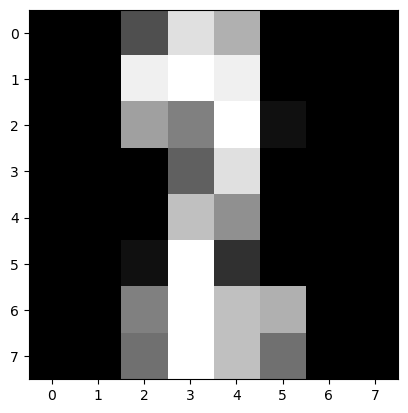

In [24]:
test_prediction(107, W1, b1, W2, b2)

Finally, let's find the accuracy on the dev set:

In [28]:
dev_predictions = make_predictions(X_test, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_test)

[0 1 1 3 4 9 6 7 1 5 0 1 2 3 4 5 6 7 1 2 0 1 2 3 4 5 6 4 1 9 0 3 5 5 6 5 0
 9 7 9 1 4 1 7 7 3 5 1 0 0 1 4 7 7 4 0 1 1 6 3 3 7 3 3 4 6 6 6 4 7 1 5 0 9
 5 1 1 1 0 0 1 7 6 3 2 1 4 7 6 3 1 3 3 1 7 6 1 4 3 1] [0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0
 9 8 9 8 4 1 7 7 3 5 1 0 0 2 2 7 8 2 0 1 2 6 3 3 7 3 3 4 6 6 6 4 9 1 5 0 9
 5 2 8 2 0 0 1 7 6 3 2 1 7 4 6 3 1 3 9 1 7 6 8 4 3 1]


0.76

model generalized from the training data well. 

Prediction:  [7]
Label:  7


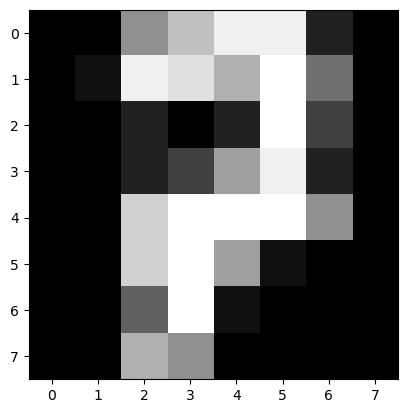

In [30]:
test_prediction(18, W1, b1, W2, b2)

**Refrences**

[1] Samson Zhang, Building a neural network FROM SCRATCH (no Tensorflow/Pytorch, just numpy & math), https://youtu.be/w8yWXqWQYmU?feature=shared